<a href="https://colab.research.google.com/github/RobDBennett/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# TODO - your code!
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data


--2020-05-12 19:00:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-05-12 19:00:40 (135 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']
df = pd.read_csv('house-votes-84.data', names=column_headers)
df = df.replace({"y": 1, "n": 0, "?": np.NaN})


In [0]:
def con_int(data, confidence=.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1+confidence) / 2.0, n-1)
  moe = t*std_err
  lower_bound = mean - moe
  upper_bound = mean + moe
  return (lower_bound, mean, upper_bound) 

In [0]:
test = df.drop(columns= ['handicapped-infants', 'water-project', 'budget',
                         'physician-fee-freeze', 'el-salvador-aid', 
                         'religious-groups', 'anti-satellite-ban', 
                         'aid-to-contras', 'mx-missile', 'immigration', 
                         'synfuels', 'education', 'right-to-sue', 'crime', 
                         'duty-free'])
test = test.dropna()


In [0]:
testr = test[test['party'] == 'republican']
testd = test[test['party'] == 'democrat']

In [31]:
con_int(testr['south-africa'])

(0.5796460416043707, 0.6575342465753424, 0.7354224515463141)

Confidence Interval 'South-Africa' bill, Republicans followed by Democrats


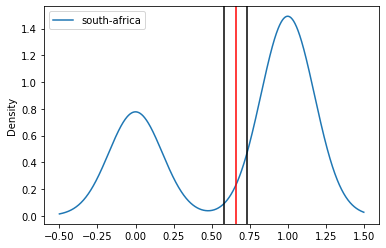

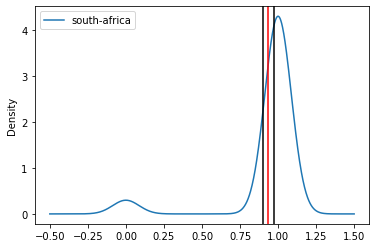

In [48]:
import matplotlib.pyplot as plt
lower1, mean1, upper1 = con_int(testr['south-africa'].dropna())
lower2, mean2, upper2 = con_int(testd['south-africa'].dropna())

print("Confidence Interval 'South-Africa' bill, Republicans followed by Democrats")
testr.plot.density()
plt.axvline(x=lower1, color='black')
plt.axvline(x=mean1, color= 'red')
plt.axvline(x=upper1, color='black')

testd.plot.density()
plt.axvline(x=lower2, color='black')
plt.axvline(x=mean2, color='red')
plt.axvline(x=upper2, color='black')
plt.show()

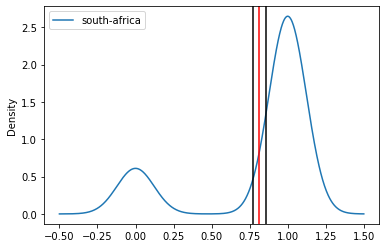

Confidence Interval for Senate on South-Africa bill


In [49]:
low3, mean3, upp3 = con_int(test['south-africa'])
test.plot.density()
plt.axvline(x=low3, color='black')
plt.axvline(x=mean3, color='red')
plt.axvline(x=upp3, color='black')
plt.show()
print("Confidence Interval for Senate on South-Africa bill")

In [44]:
print(test['south-africa'].value_counts())
print(testr['south-africa'].value_counts())
testd['south-africa'].value_counts()

1.0    269
0.0     62
Name: south-africa, dtype: int64
1.0    96
0.0    50
Name: south-africa, dtype: int64


1.0    173
0.0     12
Name: south-africa, dtype: int64

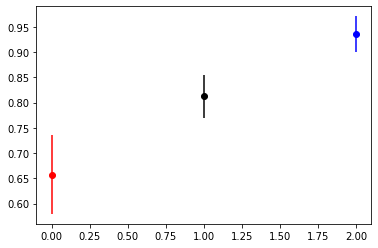

In [54]:
moe1 = upper1 - mean1
moe2 = upper2 - mean2
moe3 = upp3 - mean3
plt.errorbar(2,mean2, yerr=moe2, fmt='o', color='blue')
plt.errorbar(0, mean1, yerr=moe1, fmt='o', color='red')
plt.errorbar(1, mean3, yerr=moe3, fmt='o', color='black')
plt.show()

Conclusion- Neither the democrats nor republicans capture 95% of our data sample, which isn't surprising since the house was split at the time. When we look at the voting for South-Africa (most of my examples) and break it down by party, with a 1 being a Yes vote, and a No being a 0, we would expect to see an even voting pattern, that both parties would have a .5 for their mean value and the standard deviation would drift from there. However, we see that both parties tended to vote in favor of the bill, though democrats to a much higher percentage. 

In [55]:
#Take a dataset that we have used in the past in class that has categorical variables. 
#Pick two of those categorical variables and run a chi-squared tests on that data
# 1- By hand using Numpy
# 2- In a single line using Scipy
chiset = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
chiset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [59]:
print(chiset['race'].value_counts())
chi1 = pd.crosstab(chiset['race'], chiset['education-num'])
chi1

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
race,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,0,4,2,9,5,16,14,5,119,79,19,8,21,5,2,3
Asian-Pac-Islander,6,5,18,11,9,13,21,9,226,208,38,29,289,88,41,28
Black,5,16,21,56,89,133,153,70,1174,746,112,107,330,86,15,11
Other,2,9,13,17,8,9,10,14,78,51,6,8,33,7,4,2
White,38,134,279,553,403,762,977,335,8904,6207,1207,915,4682,1537,514,369


In [60]:
chi_marg = pd.crosstab(chiset['race'], chiset['education-num'], margins=True)
chi_marg

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
race,,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,0,4,2,9,5,16,14,5,119,79,19,8,21,5,2,3,311
Asian-Pac-Islander,6,5,18,11,9,13,21,9,226,208,38,29,289,88,41,28,1039
Black,5,16,21,56,89,133,153,70,1174,746,112,107,330,86,15,11,3124
Other,2,9,13,17,8,9,10,14,78,51,6,8,33,7,4,2,271
White,38,134,279,553,403,762,977,335,8904,6207,1207,915,4682,1537,514,369,27816
All,51,168,333,646,514,933,1175,433,10501,7291,1382,1067,5355,1723,576,413,32561


In [67]:
rows = chi_marg.iloc[0:5, 16:].values
rows = rows.T[0]
rows

array([  311,  1039,  3124,   271, 27816])

In [69]:
col = chi_marg.iloc[5:, 0:16].values
col = col[0]
col

array([   51,   168,   333,   646,   514,   933,  1175,   433, 10501,
        7291,  1382,  1067,  5355,  1723,   576,   413])

In [75]:
total = chiset.shape[0]
total

32561

In [78]:
expect = []
for i in range(len(rows)):
  expect_row = []
  for column in col:
    expect_val = column*rows[i]/total
    expect_row.append(expect_val)
  expect.append(expect_row)
expect = np.array(expect)
print(expect.shape)
print(expect)


(5, 16)
[[4.87116489e-01 1.60461902e+00 3.18058413e+00 6.17014219e+00
  4.90937011e+00 8.91136636e+00 1.12227819e+01 4.13571451e+00
  1.00298240e+02 6.96385553e+01 1.31999017e+01 1.01912411e+01
  5.11472314e+01 1.64568963e+01 5.50155094e+00 3.94468843e+00]
 [1.62737631e+00 5.36076902e+00 1.06258100e+01 2.06134332e+01
  1.64014004e+01 2.97714137e+01 3.74934738e+01 1.38167440e+01
  3.35079973e+02 2.32650994e+02 4.40987070e+01 3.40472651e+01
  1.70874512e+02 5.49797918e+01 1.83797795e+01 1.31785572e+01]
 [4.89309296e+00 1.61184239e+01 3.19490188e+01 6.19791775e+01
  4.93147016e+01 8.95148183e+01 1.12733024e+02 4.15433187e+01
  1.00749744e+03 6.99520408e+02 1.32593225e+02 1.02371180e+02
  5.13774761e+02 1.65309788e+02 5.52631676e+01 3.96244587e+01]
 [4.24464851e-01 1.39823715e+00 2.77150579e+00 5.37655477e+00
  4.27793987e+00 7.76520991e+00 9.77933724e+00 3.60378981e+00
  8.73981450e+01 6.06818280e+01 1.15021652e+01 8.88047050e+00
  4.45688093e+01 1.43402537e+01 4.79395596e+00 3.43733301e+

In [82]:
chi_sqr = ((chi1 - expect)**2 / expect).sum().sum()
chi_sqr

730.6712962254585

In [84]:
chi2, p_val, dof, expected = stats.chi2_contingency(chi1)
print(" chi2 statistics", chi2)
print("\n p-value", p_val)
print("\n degrees of freedom", dof)
print("\n expected frequencies table: \n", expected)

 chi2 statistics 730.6712962254583

 p-value 5.547319569858748e-116

 degrees of freedom 60

 expected frequencies table: 
 [[4.87116489e-01 1.60461902e+00 3.18058413e+00 6.17014219e+00
  4.90937011e+00 8.91136636e+00 1.12227819e+01 4.13571451e+00
  1.00298240e+02 6.96385553e+01 1.31999017e+01 1.01912411e+01
  5.11472314e+01 1.64568963e+01 5.50155094e+00 3.94468843e+00]
 [1.62737631e+00 5.36076902e+00 1.06258100e+01 2.06134332e+01
  1.64014004e+01 2.97714137e+01 3.74934738e+01 1.38167440e+01
  3.35079973e+02 2.32650994e+02 4.40987070e+01 3.40472651e+01
  1.70874512e+02 5.49797918e+01 1.83797795e+01 1.31785572e+01]
 [4.89309296e+00 1.61184239e+01 3.19490188e+01 6.19791775e+01
  4.93147016e+01 8.95148183e+01 1.12733024e+02 4.15433187e+01
  1.00749744e+03 6.99520408e+02 1.32593225e+02 1.02371180e+02
  5.13774761e+02 1.65309788e+02 5.52631676e+01 3.96244587e+01]
 [4.24464851e-01 1.39823715e+00 2.77150579e+00 5.37655477e+00
  4.27793987e+00 7.76520991e+00 9.77933724e+00 3.60378981e+00
  8.7

Provided I did this correctly, it seems that education and race are are very closely linked within this population. 

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)